In [1]:
import numpy as np
from pomegranate import *
from GEM import GEM

# n-group HDP hyperparameters
n = 5
gamma, alpha = 10, 1
H = NormalDistribution(0, 1)

# GEM stick breaking for the global distribution G_0
K = 100
pi_k = GEM(gamma, K=K)[:,0]

# hierarchical stick-breaking for distributions G_j
pi_kj = DirichletDistribution(alpha*pi_k).sample(n).T

# draw the atoms
phi_k = H.sample(K)


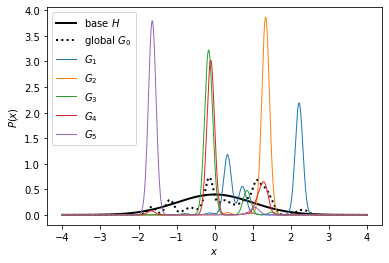

In [2]:
import matplotlib.pyplot as plt

# plot distributions, smoothed with Gaussian kernel of bandwidth bw
grid = np.linspace(-4, 4, 10000)
grid_ = np.repeat(grid[..., np.newaxis], K, axis=-1)

bw = 0.1 
kernel = np.exp(-0.5*((grid_-phi_k)/bw)**2)/np.sqrt(2*np.pi*bw**2)

G0 = np.sum(pi_k*kernel, axis=1)

pi_kj_ = np.repeat(pi_kj[np.newaxis, ...], len(grid), axis=0)
kernel_ = np.repeat(kernel[...,np.newaxis], n, axis=-1)
Gj = np.sum(pi_kj_*kernel_, axis=1)

plt.plot(grid, H.probability(grid), color='k', ls='-', lw=2, label=r'base $H$')
plt.plot(grid, G0, color='k', ls=':', lw=2, label=r'global $G_0$')
for j in range(n):
    plt.plot(grid, Gj[:,j], color=f'C{j}', ls='-', lw=1, label=f'$G_{j+1}$')

plt.xlabel(r'$x$')
plt.ylabel(r'$P(x)$')
    
plt.legend()
plt.show()
